In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df = pd.read_csv('model/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12 min,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20 min,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28 min,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5 min,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16 min,5.0,68


In [3]:
df1 = df.copy()
df1 = df1.drop(['Order_ID', 'Time_of_Day', 'Vehicle_Type'], axis = 'columns')
df1.head()

,Distance_km,Weather,Traffic_Level,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,12 min,1.0,43
1,16.42,Clear,Medium,20 min,2.0,84
2,9.52,Foggy,Low,28 min,1.0,59
3,7.44,Rainy,Medium,5 min,1.0,37
4,19.03,Clear,Low,16 min,5.0,68


In [4]:
df1.isna().sum()

Distance_km                0
Weather                   30
Traffic_Level             30
Preparation_Time           0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [5]:
df1.shape

(1000, 6)

In [6]:
df1 = df1.dropna(subset=['Weather', 'Traffic_Level'])
df1.isna().sum()

Distance_km                0
Weather                    0
Traffic_Level              0
Preparation_Time           0
Courier_Experience_yrs    29
Delivery_Time_min          0
dtype: int64

In [7]:
df1['Courier_Experience_yrs'] = df1['Courier_Experience_yrs'].fillna(df1['Courier_Experience_yrs'].mean())
df1.isna().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Preparation_Time          0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [8]:
df2 = df1.copy()
df2['Preparation_Time_Min'] = df2['Preparation_Time'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,Distance_km,Weather,Traffic_Level,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min,Preparation_Time_Min
0,7.93,Windy,Low,12 min,1.0,43,12
1,16.42,Clear,Medium,20 min,2.0,84,20
2,9.52,Foggy,Low,28 min,1.0,59,28
3,7.44,Rainy,Medium,5 min,1.0,37,5
4,19.03,Clear,Low,16 min,5.0,68,16


In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df2[~df2['Distance_km'].apply(is_float)].head(10)

,Distance_km,Weather,Traffic_Level,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min,Preparation_Time_Min


In [11]:
df2[~df2['Delivery_Time_min'].apply(is_float)].head(10)

,Distance_km,Weather,Traffic_Level,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min,Preparation_Time_Min
35,17.80,Snowy,Medium,16 min,9.0,73-74,16
150,6.89,Rainy,Medium,11 min,6.0,43-45,11
293,19.26,Windy,Medium,21 min,6.0,67-69,21
465,18.20,Windy,Medium,27 min,1.0,108-110,27
979,19.74,Rainy,High,11 min,7.0,81-83,11


In [12]:
df2.Delivery_Time_min.unique()

array(['43', '84', '59', '37', '68', '57', '49', '46', '35', '73', '88',
       '76', '53', '36', '33', '50', '24', '27', '47', '72', '58', '56',
       '64', '70', '123', '52', '108', '45', '111', '44', '73-74', '61',
       '34', '67', '8', '104', '31', '23', '82', '69', '60', '40', '38',
       '54', '87', '62', '42', '51', '41', '48', '92', '32', '71', '65',
       '28', '74', '14', '30', '94', '80', '91', '79', '77', '26', '141',
       '78', '29', '105', '16', '116', '75', '25', '113', '43-45', '17',
       '66', '100', '85', '89', '55', '21', '96', '22', '13', '90', '112',
       '67-69', '39', '63', '101', '93', '83', '20', '19', '102', '103',
       '108-110', '86', '115', '15', '98', '106', '109', '97', '18', '99',
       '81', '95', '126', '122', '114', '81-83'], dtype=object)

In [13]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df3 = df2.copy()
df3['Delivery_Time_min'] = df3['Delivery_Time_min'].apply(convert_sqft_to_num)
df3[~df3['Delivery_Time_min'].apply(is_float)].head(10)

,Distance_km,Weather,Traffic_Level,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min,Preparation_Time_Min


In [15]:
from sklearn.preprocessing import OneHotEncoder
df3.Weather.unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy'], dtype=object)

In [16]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(df3[['Weather']])
ohetransform.head()

,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [17]:
df4 = pd.concat([df3, ohetransform], axis = 1).drop('Weather', axis = 'columns')
df4.head()

,Distance_km,Traffic_Level,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min,Preparation_Time_Min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,7.93,Low,12 min,1.0,43.0,12,0.0,0.0,0.0,0.0,1.0
1,16.42,Medium,20 min,2.0,84.0,20,1.0,0.0,0.0,0.0,0.0
2,9.52,Low,28 min,1.0,59.0,28,0.0,1.0,0.0,0.0,0.0
3,7.44,Medium,5 min,1.0,37.0,5,0.0,0.0,1.0,0.0,0.0
4,19.03,Low,16 min,5.0,68.0,16,1.0,0.0,0.0,0.0,0.0


In [18]:
levels = df4.Traffic_Level.unique()

In [19]:
from sklearn.preprocessing import OrdinalEncoder

df5 = df4.copy()
enc = OrdinalEncoder(categories=[levels])
enc.fit_transform(df5[['Traffic_Level']])

df5['Traffic_Level'] = enc.fit_transform(df5[['Traffic_Level']])
df5.head()

,Distance_km,Traffic_Level,Preparation_Time,Courier_Experience_yrs,Delivery_Time_min,Preparation_Time_Min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,7.93,0.0,12 min,1.0,43.0,12,0.0,0.0,0.0,0.0,1.0
1,16.42,1.0,20 min,2.0,84.0,20,1.0,0.0,0.0,0.0,0.0
2,9.52,0.0,28 min,1.0,59.0,28,0.0,1.0,0.0,0.0,0.0
3,7.44,1.0,5 min,1.0,37.0,5,0.0,0.0,1.0,0.0,0.0
4,19.03,0.0,16 min,5.0,68.0,16,1.0,0.0,0.0,0.0,0.0


In [20]:
df5['Delivery_Time_min'] = df5.Delivery_Time_min - df5.Preparation_Time_Min
df5.drop(['Preparation_Time_Min', 'Preparation_Time'], axis ='columns', inplace = True)
df5.head()

,Distance_km,Traffic_Level,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,7.93,0.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0
1,16.42,1.0,2.0,64.0,1.0,0.0,0.0,0.0,0.0
2,9.52,0.0,1.0,31.0,0.0,1.0,0.0,0.0,0.0
3,7.44,1.0,1.0,32.0,0.0,0.0,1.0,0.0,0.0
4,19.03,0.0,5.0,52.0,1.0,0.0,0.0,0.0,0.0


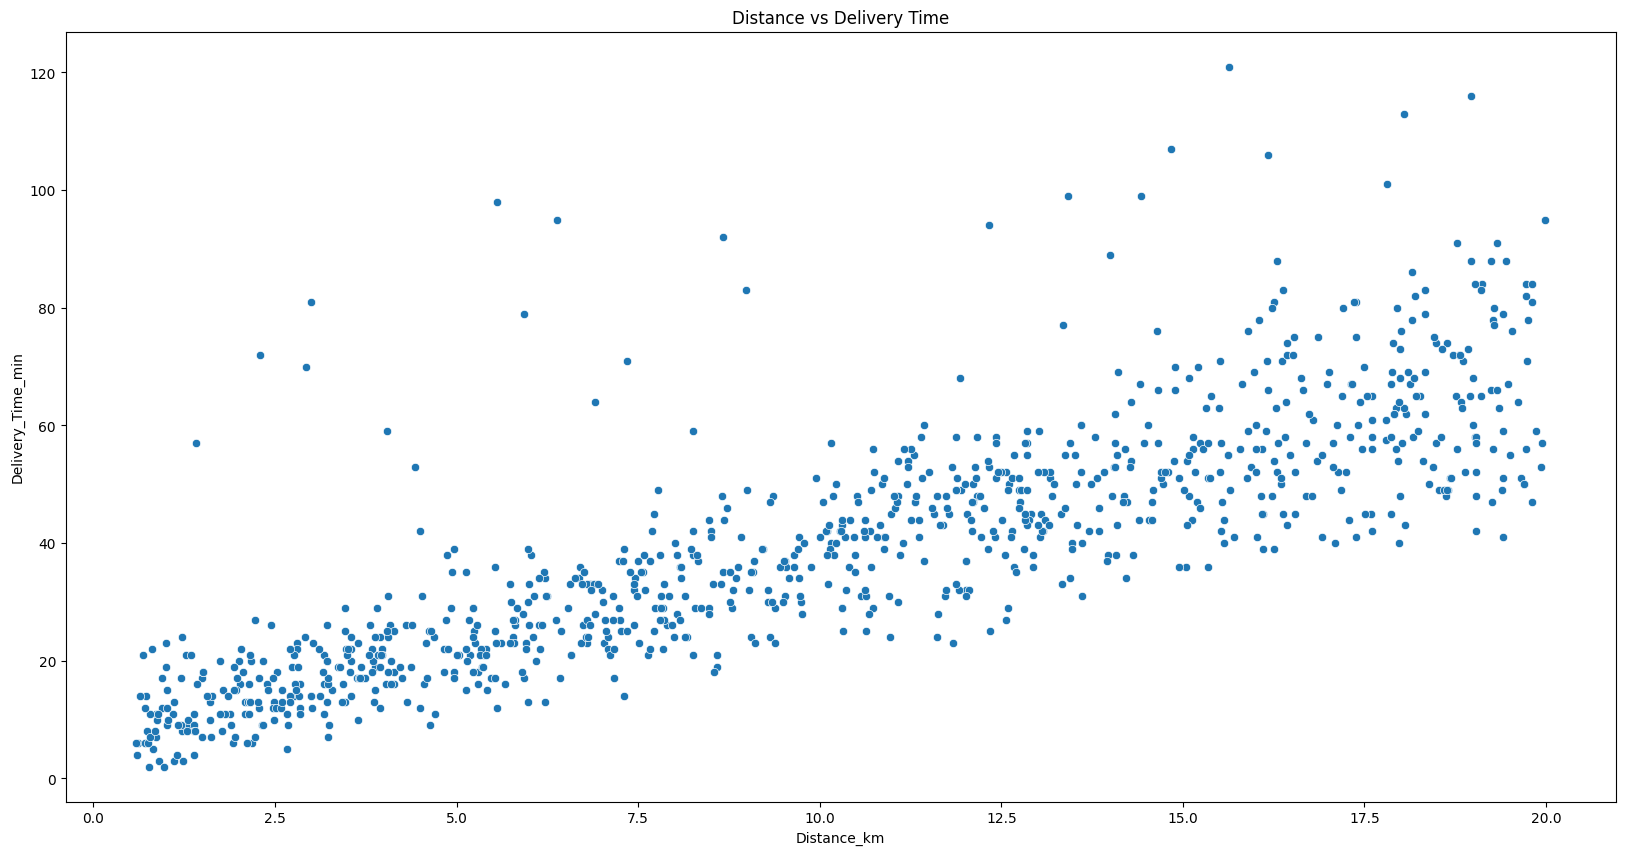

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df5,
    x='Distance_km',
    y='Delivery_Time_min'
)
plt.title('Distance vs Delivery Time')
plt.show()

In [87]:
Q1 = df5[['Distance_km', 'Delivery_Time_min']].quantile(0.25)
Q3 = df5[['Distance_km', 'Delivery_Time_min']].quantile(0.75)
IQR = Q3 - Q1

mask = ~(
    (df5[['Distance_km', 'Delivery_Time_min']] < (Q1 - 1.5 * IQR)) |
    (df5[['Distance_km', 'Delivery_Time_min']] > (Q3 + 1.5 * IQR))
).any(axis=1)

clean_df = df5[mask]


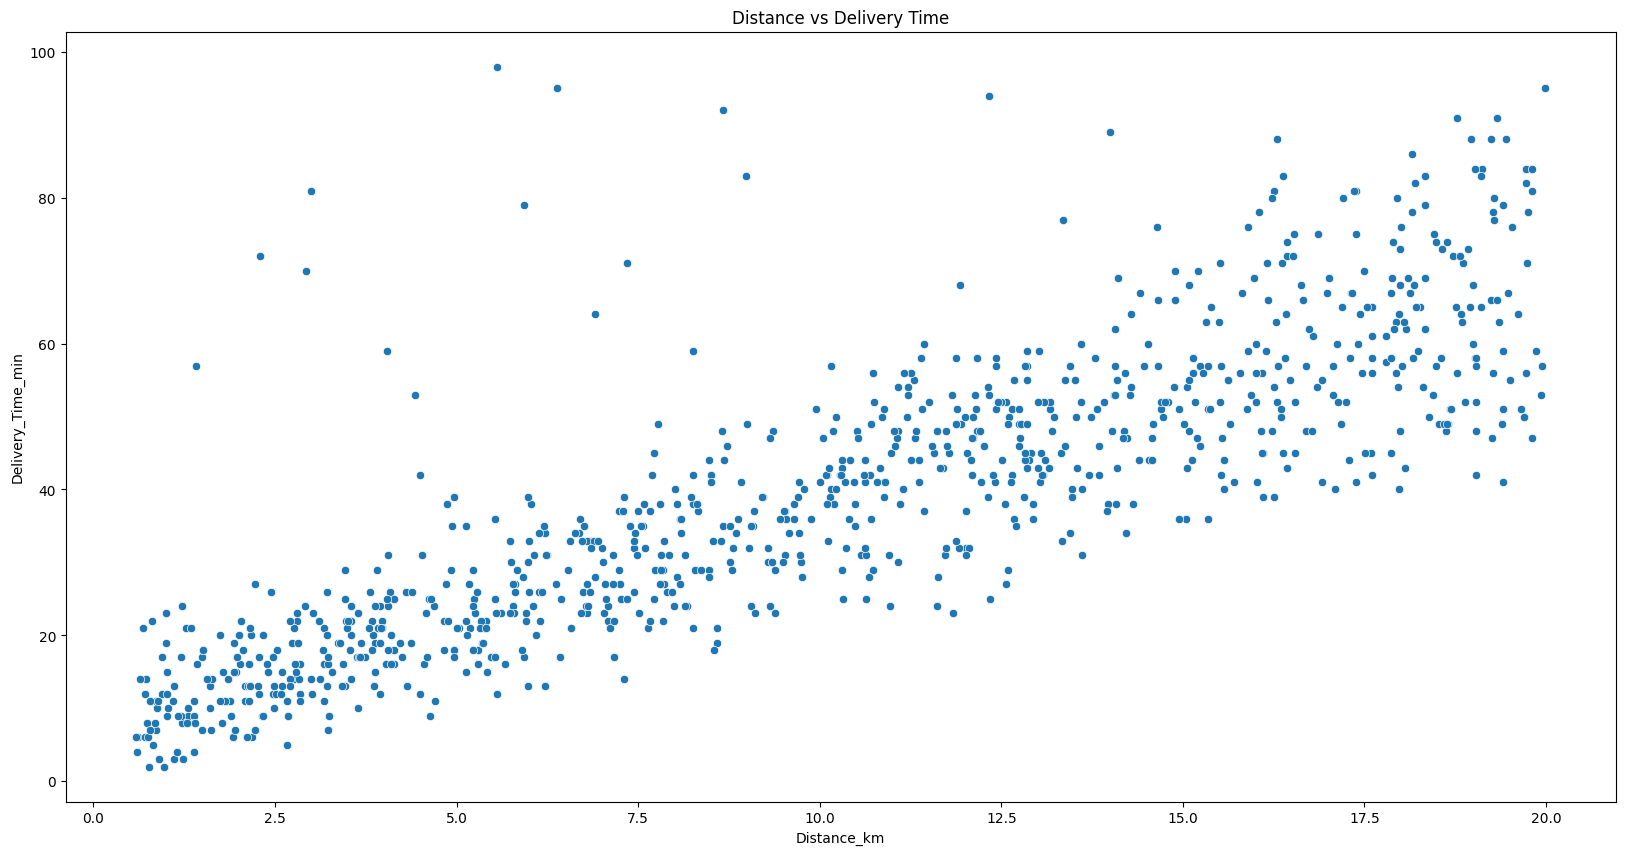

In [88]:
sns.scatterplot(
    data=clean_df,
    x='Distance_km',
    y='Delivery_Time_min'
)
plt.title('Distance vs Delivery Time')
plt.show()

In [24]:
df5.shape

(940, 9)

In [25]:
df6 = clean_df.copy()
df6.head()

,Distance_km,Traffic_Level,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,7.93,0.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0
1,16.42,1.0,2.0,64.0,1.0,0.0,0.0,0.0,0.0
2,9.52,0.0,1.0,31.0,0.0,1.0,0.0,0.0,0.0
3,7.44,1.0,1.0,32.0,0.0,0.0,1.0,0.0,0.0
4,19.03,0.0,5.0,52.0,1.0,0.0,0.0,0.0,0.0


In [26]:
df6.shape

(932, 9)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

X = df6.drop(['Delivery_Time_min'], axis = 'columns')
y = df6.Delivery_Time_min
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [65]:
def find_best_model_using_gridsearchcv(X_train, y_train):

    algos = {
        'linear_regression': {
            'pipeline': Pipeline([
                ('scaler', StandardScaler()),
                ('model', LinearRegression())
            ]),
            'params': {
                'model__fit_intercept': [True, False]
            }
        },

        'lasso': {
            'pipeline': Pipeline([
                ('scaler', StandardScaler()),
                ('model', Lasso(max_iter=10000))
            ]),
            'params': {
                'model__alpha': [0.1, 1, 2],
                'model__selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'pipeline': Pipeline([
                ('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor(random_state=42))
            ]),
            'params': {
                'model__criterion': [
                    'squared_error',
                    'friedman_mse',
                    'absolute_error'
                ],
                'model__splitter': ['best', 'random']
            }
        }
    }

    results = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(
            estimator=config['pipeline'],
            param_grid=config['params'],
            cv=cv,
            scoring='r2',
            n_jobs=-1
        )

        gs.fit(X_train, y_train)

        results.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'best_estimator': gs.best_estimator_
        })

    return pd.DataFrame(results)


In [66]:
model_df = find_best_model_using_gridsearchcv(X_train, y_train)
print(model_df[['model', 'best_score', 'best_params']])

               model  best_score  \
0  linear_regression    0.804137   
1              lasso    0.804785   
2      decision_tree    0.641010   

                                         best_params  
0                     {'model__fit_intercept': True}  
1  {'model__alpha': 0.1, 'model__selection': 'ran...  
2  {'model__criterion': 'friedman_mse', 'model__s...  


In [67]:
best_row = model_df.loc[model_df['best_score'].idxmax()]
best_model = best_row['best_estimator']
print(best_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 Lasso(alpha=0.1, max_iter=10000, selection='random'))])


In [68]:
best_model.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True


In [80]:
y_pred = best_model.predict(X_test)
y_pred[:5]

array([21.63039914, 26.67599746, 35.57320604, 53.95859245, 29.51711855])

In [81]:
y_test[:5]

906    19.0
49     35.0
739    41.0
161    42.0
144    21.0
Name: Delivery_Time_min, dtype: float64

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [72]:
print(mae)

5.576102455059333


In [73]:
print(mse)

80.757702103507


In [39]:
import pickle
with open('model/food_delivery_time_model.pickle', 'wb') as f:
    pickle.dump(best_model,f)

In [40]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('model/columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [74]:
mape = (abs(y_test - y_pred) / y_test).mean() * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 15.58%


In [78]:
with open('model/food_delivery_time_model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

In [79]:
loaded_model.predict(X_test)

array([21.65438623, 26.66758822, 35.5604586 , 53.94792341, 29.50459659,
        9.36520447, 32.63709618, 52.27547069, 12.364575  , 43.88773451,
       28.77283991, 50.8912341 , 22.46978567, 67.46497155, 53.76095908,
       13.42505389, 23.53504906, 26.37314275, 51.85505601, 12.46147282,
       39.33784647, 41.58736447, 22.92303567, 43.5377665 , 66.0879433 ,
       45.5379748 , 54.36936009, 41.39748759, 48.77975306, 17.392833  ,
        8.18298821, 54.17882074, 34.90906401, 17.08740854, 47.0993526 ,
       39.1010363 , 30.09944119, 28.1384954 , 40.16790282, 65.6777669 ,
       57.31551605, 26.92048743, 34.41818178, 24.85514403, 60.10801028,
       44.22351696,  8.1831069 , 67.16297948, 13.69085976, 60.53787574,
       42.06398323, 40.07699696, 15.84735913, 23.63658329,  6.59673128,
       12.98050714, 11.42332504, 44.81907719, 35.66514589, 54.62652293,
       48.20172114, 18.88363697, 49.88935403, 23.26481009, 46.88263236,
        5.9624659 , 50.51638697, 47.43509549, 41.17709445, 43.59

In [89]:
X_test[:5]

,Distance_km,Traffic_Level,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
906,3.69,1.0,8.0,0.0,0.0,1.0,0.0,0.0
49,7.57,0.0,0.0,1.0,0.0,0.0,0.0,0.0
739,10.35,1.0,9.0,1.0,0.0,0.0,0.0,0.0
161,17.60,0.0,3.0,1.0,0.0,0.0,0.0,0.0
144,8.25,1.0,9.0,1.0,0.0,0.0,0.0,0.0
